In [6]:
%matplotlib inline


# Single-subject data (two sessions) in native space

The example shows the analysis of an SPM dataset studying face perception.  The
anaylsis is performed in native space. Realignment parameters are provided with
the input images, but those have not been resampled to a common space.

The experimental paradigm is simple, with two conditions; viewing a face image
or a scrambled face image, supposedly with the same low-level statistical
properties, to find face-specific responses.

For details on the data, please see:
Henson, R.N., Goshen-Gottstein, Y., Ganel, T., Otten, L.J., Quayle, A.,
Rugg, M.D. Electrophysiological and haemodynamic correlates of face
perception, recognition and priming. Cereb Cortex. 2003 Jul;13(7):793-805.
http://www.dx.doi.org/10.1093/cercor/13.7.793

This example takes a lot of time because the input are lists of 3D images
sampled in different positions (encoded by different affine functions).


Fetch the SPM multimodal_faces data.



In [7]:
from nilearn.datasets import fetch_spm_multimodal_fmri
import os
subject_data = fetch_spm_multimodal_fmri(data_dir=os.path.join(
        os.path.dirname(os.getcwd()),'spm_multimodal_fmri'))

/home/fnadeau/myenv/lib/python3.7/site-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


Specfiy timing and design matrix parameters.



In [8]:
tr = 2.  # repetition time, in seconds
slice_time_ref = 0.  # we will sample the design matrix at the beggining of each acquisition
drift_model = 'Cosine'  # We use a discrete cosine transform to model signal drifts.
high_pass = .01  # The cutoff for the drift model is 0.01 Hz.
hrf_model = 'spm + derivative'  # The hemodynamic response function is the SPM canonical one.

Resample the images.

This is achieved by the concat_imgs function of Nilearn.



In [10]:
import warnings
warnings.filterwarnings('ignore')
from nilearn.image import concat_imgs, resample_img, mean_img
fmri_img = [concat_imgs(subject_data.func1, auto_resample=True),
            concat_imgs(subject_data.func2, auto_resample=True)]
affine, shape = fmri_img[0].affine, fmri_img[0].shape
print('Resampling the second image (this takes time)...')
fmri_img[1] = resample_img(fmri_img[1], affine, shape[:3])

Resampling the second image (this takes time)...


In [44]:
import loadutils as lu
import nibabel as nib
img_files = [itm for itm in lu.flatten(list(subject_data.values())) if itm.endswith('.img')]
smri_img = nib.load('/data/cisl/DATA/spm_multimodal_fmri/spm_multimodal_fmri/sub001/sMRI/smri.img')
smri_header = dict(smri_img.header)
# smri_header
session1_imgs = img_files[:int(len(img_files)/2)]
# [nib.load(img).shape for img in session1_imgs]
mean_concat_s1_imgs = mean_img(concat_imgs(session1_imgs, auto_resample=True))

Let's create mean image for display purposes.



In [45]:
mean_image = mean_img(fmri_img)

In [48]:
mean_concat_s1_imgs.affine == mean_image.affine

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [49]:
# subject_data.keys() = ['slice_order', 'func1', 'trials_ses1', 'events1', 'func2', 'trials_ses2', 'events2', 'anat']
import scipy.io
trial_ses1 = scipy.io.loadmat(subject_data['trials_ses1'])
trial_ses2 = scipy.io.loadmat(subject_data['trials_ses2'])
trial_ses1,trial_ses2
# mat.keys() = ['__header__', '__version__', '__globals__', 'names', 'onsets', 'durations']
# subject_data['trials_ses1']
# from pandas import DataFrame as df
# # tuple(zip(mat['names'],mat['onsets'],mat['durations']))
# mat['durations']
# df(tuple((itm[0], itm[1]) for itm in tuple(mat.items())))

({'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Sep  9 15:02:37 2009',
  '__version__': '1.0',
  '__globals__': [],
  'names': array([[array(['faces'], dtype='<U5')],
         [array(['scrambled'], dtype='<U9')]], dtype=object),
  'onsets': array([[array([[  7.8615,  12.394 ,  44.119 ,  57.713 ,  62.2435,  63.755 ,
           69.7985,  74.3365,  78.8685, 101.528 , 106.0615, 110.5935,
          112.105 , 113.6155, 115.1265, 116.6375, 121.1705, 128.7235,
          133.2535, 136.2745, 142.3235, 145.3495, 149.8795, 168.011 ,
          171.0325, 174.0525, 183.115 , 199.728 , 202.75  , 205.773 ,
          207.284 , 208.798 , 213.336 , 217.8695, 219.3805, 222.4045,
          228.451 , 231.474 , 245.0695, 258.665 , 261.687 , 264.707 ,
          269.238 , 270.7495, 278.305 , 281.331 , 282.845 , 285.867 ,
          288.8905, 294.933 , 314.573 , 320.6125, 325.145 , 326.6565,
          329.6765, 337.2285, 340.2505, 349.3175, 350.831 , 358.3855,
          359.8965, 376.5125

Make the design matrices.



In [51]:
import pandas as pd
display(pd.read_csv(subject_data['events1'],sep='\t'),
        pd.read_csv(subject_data['events2'],sep='\t'),
        mean_image.shape)

,trial_type,onset,duration
0,faces,15.723,1.0
1,faces,24.788,1.0
2,faces,88.238,1.0
3,faces,115.426,1.0
4,faces,124.487,1.0
...,...,...,...
145,scrambled,746.979,1.0
146,scrambled,750.002,1.0
147,scrambled,756.048,1.0
148,scrambled,762.088,1.0


,trial_type,onset,duration
0,faces,15.704,1.0
1,faces,24.767,1.0
2,faces,88.249,1.0
3,faces,115.443,1.0
4,faces,124.505,1.0
...,...,...,...
145,scrambled,747.047,1.0
146,scrambled,750.070,1.0
147,scrambled,756.120,1.0
148,scrambled,762.171,1.0


(64, 64, 32)

In [52]:
import numpy as np
import pandas as pd
from nilearn.glm.first_level import make_first_level_design_matrix

Loop over the two sessions.



In [53]:
import numpy as np
import pandas as pd
from nilearn.glm.first_level import make_first_level_design_matrix

def make_design_matrices(fmri_img):
    design_matrices = []
    for idx, img in enumerate(fmri_img, start=1):
        # Build experimental paradigm
        n_scans = img.shape[-1]
        events = pd.read_table(subject_data['events{}'.format(idx)])
        # Define the sampling times for the design matrix
        frame_times = np.arange(n_scans) * tr
        # Build design matrix with the reviously defined parameters
        design_matrix = make_first_level_design_matrix(
                frame_times,
                events,
                hrf_model='spm',
                drift_model='cosine',
    #             high_pass=high_pass,
                )
        # put the design matrices in a list
        design_matrices.append(design_matrix)
    return design_matrices,events
design_matrices,events=make_design_matrices(fmri_img)

In [54]:
subject_data['events{}'.format(2)]

'/data/cisl/DATA/spm_multimodal_fmri/spm_multimodal_fmri/sub001/fMRI/session2_events.tsv'

We can specify basic contrasts (to get beta maps).
We start by specifying canonical contrast that isolate design matrix columns.
We actually want more interesting contrasts. The simplest contrast
just makes the difference between the two main conditions.  We
define the two opposite versions to run one-tailed t-tests.  We also
define the effects of interest contrast, a 2-dimensional contrasts
spanning the two conditions.

In [61]:
import numpy as np
contrast_matrix = np.eye(design_matrices[0].shape[1])
basic_contrasts = dict([(column, contrast_matrix[i])
                        for i, column in enumerate(design_matrices[0].columns)])
contrasts = {
    'faces-scrambled': basic_contrasts['faces'] - basic_contrasts['scrambled'],
    'scrambled-faces': -basic_contrasts['faces'] + basic_contrasts['scrambled'],
    'effects_of_interest': np.vstack((basic_contrasts['faces'],
                                      basic_contrasts['scrambled']))
    }
contrasts

{'faces-scrambled': array([ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]),
 'scrambled-faces': array([-1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]),
 'effects_of_interest': array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])}

Fit the GLM for the 2 sessions by speficying a FirstLevelModel and then
fitting it.



In [58]:
from nilearn.glm.first_level import FirstLevelModel
print('Fitting a GLM')
fmri_glm = FirstLevelModel()
fmri_glm = fmri_glm.fit(fmri_img, design_matrices=design_matrices)

Fitting a GLM


Now we can compute contrast-related statistical maps (in z-scale), and plot
them.



In [198]:
print('Computing contrasts')
from nilearn import plotting

# Iterate on contrasts
for contrast_id, contrast_val in contrasts.items():
    computed_contrasts = []
    print("\tcontrast id: %s" % contrast_id)
    # compute the contrasts
    z_map = fmri_glm.compute_contrast(
        contrast_val, output_type='z_score')
    
    # plot the contrasts as soon as they're generated
    # the display is overlayed on the mean fMRI image
    # a threshold of 3.0 is used, more sophisticated choices are possible
#     plotting.plot_stat_map(
#         z_map, bg_img=mean_image, threshold=3.0, display_mode='z',
#         cut_coords=3, black_bg=True, title=contrast_id)
#     plotting.show()

Computing contrasts
	contrast id: faces-scrambled
	contrast id: scrambled-faces
	contrast id: effects_of_interest


,0
0,a
1,b
2,c
3,d
4,a
5,b
6,c
7,d
8,a
9,b


In [261]:
dict.fromkeys([itm[:-1] for itm in
 list(dict.fromkeys(pd.Series((tuple(zip([row[1][0]]*test.shape[0], test[1].values)))
 for row in test.iterrows()).unique().tolist()).items())])

{((('false_alarm', ' - false_alarm'),
   ('false_alarm', ' - hit'),
   ('false_alarm', ' - miss'),
   ('false_alarm', ' - recog_ok_spatial_wrong'),
   ('false_alarm', ' - constant')),): None,
 ((('hit', ' - false_alarm'),
   ('hit', ' - hit'),
   ('hit', ' - miss'),
   ('hit', ' - recog_ok_spatial_wrong'),
   ('hit', ' - constant')),): None,
 ((('miss', ' - false_alarm'),
   ('miss', ' - hit'),
   ('miss', ' - miss'),
   ('miss', ' - recog_ok_spatial_wrong'),
   ('miss', ' - constant')),): None,
 ((('recog_ok_spatial_wrong', ' - false_alarm'),
   ('recog_ok_spatial_wrong', ' - hit'),
   ('recog_ok_spatial_wrong', ' - miss'),
   ('recog_ok_spatial_wrong', ' - recog_ok_spatial_wrong'),
   ('recog_ok_spatial_wrong', ' - constant')),): None,
 ((('constant', ' - false_alarm'),
   ('constant', ' - hit'),
   ('constant', ' - miss'),
   ('constant', ' - recog_ok_spatial_wrong'),
   ('constant', ' - constant')),): None}

In [246]:
subject00_contrasts = {'false_alarm': np.array([1., 0., 0., 0., 0.]),
                         'hit': np.array([0., 1., 0., 0., 0.]),
                         'miss': np.array([0., 0., 1., 0., 0.]),
                         'recog_ok_spatial_wrong': np.array([0., 0., 0., 1., 0.]),
                         'constant': np.array([0., 0., 0., 0., 1.])}
names = list(subject00_contrasts.keys())
negatives = [' - '+name for name in subject00_cnames]
test = df((names,negatives)).T

# pd.Series([tuple(zip([name]*len(names),negatives)) for name in names]).unique().tolist()

In [210]:


# names_=df(tuple(zip(subject00_cnames,[' - '+name for name in subject00_cnames])))
# names_

# np.array([tuple(zip(names_[0].values.tolist(),
#            names_[1].values.tolist()))]*names_.shape[0])
# names_array=np.array([tuple(zip([row[1][0]]*names_.shape[0],
#            names_[1].values)) for row in names_.iterrows()])
# df(enumerate(tuple(tuple(itm)) for itm in names_array)).values
# list((itm[0],itm[1]) for itm in names_array)
# tuple(zip(lu.evenodd(df(names_array.flatten()).values.tolist())))
# [pd.Series(itm) for itm in names_array]
# lu.evenodd(lu.flatten(pd.Series([[tuple(val) for val in itm]
#                                  for itm in names_array]).values.flatten().tolist()))
# lu.flatten()
# df(pd.Series([[tuple(itm) for itm in val] for val in names_array]))[0].values.flatten().tolist()
# [tuple(zip(itm[1],itm[0])) for itm in names_array]
# df([tuple(itm) for itm in names_array]).values
# [[row[1][0]]*[names_[1].values] for row in names_.iterrows()]
# df(names_)
# tuple(zip(lu.evenodd(tuple(zip([([row[1][0]]*names_.shape[0],
#                        df(names_)[1].values) for row in df(names_).iterrows()])))))
# tuple(zip(names_,names_)*len(names_))
# names_matrix=df(list(enumerate(subject00_cnames)),
#    [' - '+itm for itm in subject00_cnames])
# [(row[0],row[1]) for row in names_matrix.iterrows()]
# tuple(zip([[itm] for itm in subject00_cnames],
#           [['-'+itm] for itm in subject00_cnames]))
# import numpy as np
# # np.array(tuple(zip(subject00_cnames,list(reversed(subject00_cnames)))))
# names_matrix=df(index=subject00_cnames,columns=[' - '+name for name in subject00_cnames])
# # tuple(tuple(zip(next(names_matrix.index.__iter__()),names_matrix.columns)))
# # cnames=names_matrix.index
# lu.evenodd(lu.flatten(pd.Series([(tuple(zip([ind]*names_matrix.shape[0],list(names_matrix.columns))))
#  for ind in names_matrix.index]).unique().flatten().tolist()))

array([[['false_alarm', ' - false_alarm'],
        ['hit', ' - hit'],
        ['miss', ' - miss'],
        ['recog_ok_spatial_wrong', ' - recog_ok_spatial_wrong'],
        ['constant', ' - constant']],

       [['false_alarm', ' - false_alarm'],
        ['hit', ' - hit'],
        ['miss', ' - miss'],
        ['recog_ok_spatial_wrong', ' - recog_ok_spatial_wrong'],
        ['constant', ' - constant']],

       [['false_alarm', ' - false_alarm'],
        ['hit', ' - hit'],
        ['miss', ' - miss'],
        ['recog_ok_spatial_wrong', ' - recog_ok_spatial_wrong'],
        ['constant', ' - constant']],

       [['false_alarm', ' - false_alarm'],
        ['hit', ' - hit'],
        ['miss', ' - miss'],
        ['recog_ok_spatial_wrong', ' - recog_ok_spatial_wrong'],
        ['constant', ' - constant']],

       [['false_alarm', ' - false_alarm'],
        ['hit', ' - hit'],
        ['miss', ' - miss'],
        ['recog_ok_spatial_wrong', ' - recog_ok_spatial_wrong'],
        ['constant', ' -

In [212]:
categories = list('abcd')
minus_categories = [' - '+categ for categ in categories]
categories,minus_categories

(['a', 'b', 'c', 'd'], [' - a', ' - b', ' - c', ' - d'])

plot the contrasts as soon as they're generated
the display is overlayed on the mean fMRI image
a threshold of 3.0 is used, more sophisticated choices are possible

In [63]:
computed_contrasts=[fmri_glm.compute_contrast(
                         contrast_val, output_type='z_score')
                    for contrast_id, contrast_val in contrasts.items()]

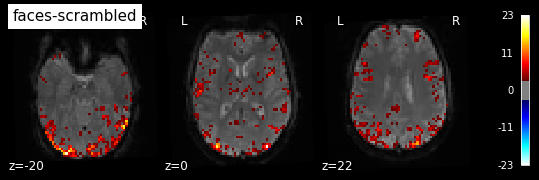

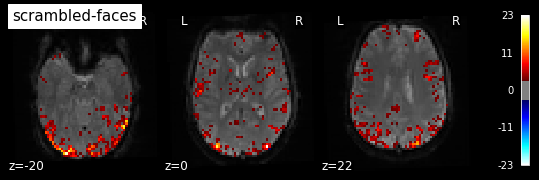

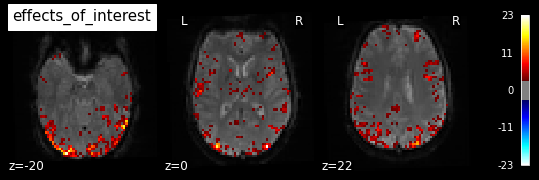

In [64]:
[plotting.plot_stat_map(z_map, bg_img=mean_image,
                       threshold=3.0, display_mode='z',
                       cut_coords=3, black_bg=True,
                       title=contrast_id)
 for contrast_id, contrast in list(contrasts.items())]
plotting.show()

Based on the resulting maps we observe that the analysis results in
wide activity for the 'effects of interest' contrast, showing the
implications of large portions of the visual cortex in the
conditions. By contrast, the differential effect between "faces" and
"scrambled" involves sparser, more anterior and lateral regions. It
also displays some responses in the frontal lobe.

